## Libraries and Data

In [1]:
import pandas as pd
import numpy as np
ad=pd.read_csv("Advertising.csv", usecols=[1,2,3,4])
df=ad.copy()
df.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# We will use TV and Sales 
After then, we will use TV and Sales column because this is a simple linear model. 

In [2]:
df_new=pd.DataFrame({"TV":df["TV"],
        "sales":df["sales"]})
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


## Let's calculate the Correlation between TV and Sales

In [3]:
df_new["xi"] = df_new["TV"]-df_new["TV"].mean() 
df_new["yi"]=df_new["sales"]-df_new["sales"].mean()
df_new["xi^2"]=df_new["xi"]**2
df_new["yi^2"]=df_new["yi"]**2
df_new

,TV,sales,xi,yi,xi^2,yi^2
0,230.1,22.1,83.0575,8.0775,6898.548306,65.246006
1,44.5,10.4,-102.5425,-3.6225,10514.964306,13.122506
2,17.2,9.3,-129.8425,-4.7225,16859.074806,22.302006
3,151.5,18.5,4.4575,4.4775,19.869306,20.048006
4,180.8,12.9,33.7575,-1.1225,1139.568806,1.260006
...,...,...,...,...,...,...
195,38.2,7.6,-108.8425,-6.4225,11846.689806,41.248506
196,94.2,9.7,-52.8425,-4.3225,2792.329806,18.684006
197,177.0,12.8,29.9575,-1.2225,897.451806,1.494506
198,283.6,25.5,136.5575,11.4775,18647.950806,131.733006


In [4]:
df_new["xi*yi"]=df_new["xi"]*df_new["yi"]
df_new["corr"]=df_new["xi*yi"].sum() / np.sqrt(df_new["xi^2"].sum()*df_new["yi^2"].sum())


#### Correlation = 0.782224, it means there is a good relationship between TV and sales and it deserves
#### a regression model.


## Let's calculate the Coefficents (B0 and B1)

In [5]:
B1=df_new["xi*yi"].sum() / df_new["xi^2"].sum()
B0=df_new["sales"].mean() - B1*df_new["TV"].mean()
print(B1,B0)

0.047536640433019736 7.032593549127698


#### Fit the model and predict sales respect to TV

In [6]:
df_p=pd.DataFrame({"TV":df["TV"],
        "sales":df["sales"]})
df_p.describe().T
df_p["prediction"]=(B0+df_new["TV"]*B1)
df_p

,TV,sales,prediction
0,230.1,22.1,17.970775
1,44.5,10.4,9.147974
2,17.2,9.3,7.850224
3,151.5,18.5,14.234395
4,180.8,12.9,15.627218
...,...,...,...
195,38.2,7.6,8.848493
196,94.2,9.7,11.510545
197,177.0,12.8,15.446579
198,283.6,25.5,20.513985


#### Calculate your error terms.

In [7]:
df_p["errors"]=df["sales"]-df_p["prediction"]
df_p

,TV,sales,prediction,errors
0,230.1,22.1,17.970775,4.129225
1,44.5,10.4,9.147974,1.252026
2,17.2,9.3,7.850224,1.449776
3,151.5,18.5,14.234395,4.265605
4,180.8,12.9,15.627218,-2.727218
...,...,...,...,...
195,38.2,7.6,8.848493,-1.248493
196,94.2,9.7,11.510545,-1.810545
197,177.0,12.8,15.446579,-2.646579
198,283.6,25.5,20.513985,4.986015


#### Residual Graph

In [8]:
import seaborn as sns

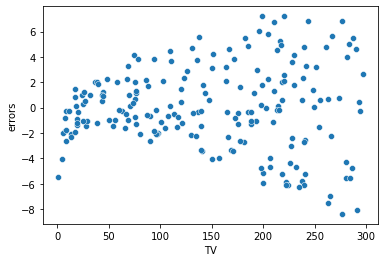

In [9]:
sns.scatterplot(x=df_p["TV"],y=df_p["errors"], data=df_p);

#### Standardized Residual Graph

In [10]:
df_p["e^2"]=df_p["errors"]**2
df_p["mse"]=df_p["e^2"].sum()/len(df_p["TV"]-1)
df_p["std.e"]=df_p["errors"]/np.sqrt(df_p["mse"])
df_p

,TV,sales,prediction,errors,e^2,mse,std.e
0,230.1,22.1,17.970775,4.129225,17.050503,10.512653,1.273540
1,44.5,10.4,9.147974,1.252026,1.567569,10.512653,0.386151
2,17.2,9.3,7.850224,1.449776,2.101851,10.512653,0.447141
3,151.5,18.5,14.234395,4.265605,18.195390,10.512653,1.315602
4,180.8,12.9,15.627218,-2.727218,7.437719,10.512653,-0.841131
...,...,...,...,...,...,...,...
195,38.2,7.6,8.848493,-1.248493,1.558735,10.512653,-0.385061
196,94.2,9.7,11.510545,-1.810545,3.278073,10.512653,-0.558410
197,177.0,12.8,15.446579,-2.646579,7.004380,10.512653,-0.816260
198,283.6,25.5,20.513985,4.986015,24.860348,10.512653,1.537791


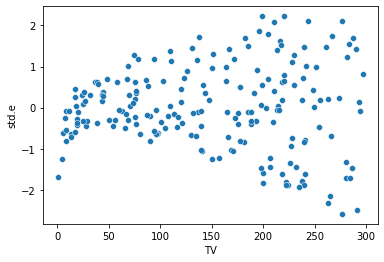

In [11]:
sns.scatterplot(x=df_p["TV"],y=df_p["std.e"]);